<a href="https://colab.research.google.com/github/Elizabeth0311/CodeStates_Project/blob/main/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ❖2018-2019 국민여행실태조사 설문데이터를 활용한 여행경험자 1회 여행지출 예측모델 만들기



In [1]:
# 데이터 불러오기 

import pandas as pd
travel_2019 = pd.read_excel('/content/drive/MyDrive/Code states/se2 project/2019_국내여행.xlsx')
travel_2018 = pd.read_excel('/content/drive/MyDrive/Code states/se2 project/2018_국내여행.xlsx')
df = pd.concat([travel_2018, travel_2019],axis=0)
df.head() 

,ID,연도,월,국내관광여부,국내출장여부,귀성친지방문여부,주요교통수단,전반적만족도,재방문의도,타인추천의도,성별,연령대,거주지,가중치,국내_여행방문지_국내전체1,국내_월별여행경험_국내전체,국내_A_여행횟수_국내전체,국내_A_여행일수_국내전체,국내_A_여행지출_국내전체,국내_A_여행경험자1회_여행지출_국내전체
0,11010560291_702520,NaN,NaN,2,2,2,NaN,NaN,NaN,NaN,1,3,11,44476.94,NaN,0,0.0,0,0.0,NaN
1,11010560291_702521,NaN,NaN,2,2,2,NaN,NaN,NaN,NaN,2,4,11,32846.91,NaN,0,0.0,0,0.0,NaN
2,11010560291_702526,NaN,7.0,2,2,2,NaN,NaN,NaN,NaN,2,2,11,45431.43,NaN,0,0.0,0,0.0,NaN
3,11010560291_702539,2018.0,NaN,1,2,2,1.0,4.0,5.0,4.0,2,6,11,38728.41,39.0,1,1.0,3,360000.0,360000.0
4,11010560291_702558,NaN,NaN,2,2,2,NaN,NaN,NaN,NaN,1,5,11,34507.32,NaN,0,0.0,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48264,39020620091_1382329,NaN,NaN,2,2,2,NaN,NaN,NaN,NaN,2,5,39,17683.18,NaN,0,0.0,0,0.0,NaN
48265,39020620091_1382420,NaN,NaN,2,2,2,NaN,NaN,NaN,NaN,2,3,39,24891.95,NaN,0,0.0,0,0.0,NaN
48266,39020620091_1382421,2019.0,12.0,1,2,2,6.0,4.0,4.0,4.0,2,1,39,40675.91,39.0,1,1.0,2,100000.0,100000.0
48267,39020620091_1382423,2019.0,12.0,2,2,2,NaN,NaN,NaN,NaN,1,3,39,4739.57,39.0,1,1.0,1,50000.0,50000.0


In [2]:
# target 결측치 제거 , 분명하지 않은 날짜(연도,월)도 제거해준다. (시계열데이터로 활용할것이기 때문에)

travel = df.dropna(subset=['국내_A_여행경험자1회_여행지출_국내전체','연도','월'])
travel.head()

,ID,연도,월,국내관광여부,국내출장여부,귀성친지방문여부,주요교통수단,전반적만족도,재방문의도,타인추천의도,성별,연령대,거주지,가중치,국내_여행방문지_국내전체1,국내_월별여행경험_국내전체,국내_A_여행횟수_국내전체,국내_A_여행일수_국내전체,국내_A_여행지출_국내전체,국내_A_여행경험자1회_여행지출_국내전체
5,11010560321_500005,2018.0,5.0,1,2,2,7.0,4.0,4.0,3.0,2,5,11,24978.80,34.0,1,1.0,1,57200.0,57200.0
6,11010560321_500010,2018.0,5.0,1,2,2,1.0,4.0,4.0,4.0,1,7,11,40998.79,31.0,1,1.0,1,90000.0,90000.0
9,11010560321_500029,2018.0,5.0,1,2,2,1.0,4.0,4.0,3.0,2,6,11,35549.36,35.0,1,1.0,3,68500.0,68500.0
10,11010600061_900004,2018.0,9.0,1,2,2,1.0,4.0,4.0,4.0,2,6,11,41515.66,36.0,1,1.0,2,100000.0,100000.0
11,11010600061_900010,2018.0,9.0,1,2,1,1.0,4.0,4.0,4.0,2,3,11,13689.06,35.0,1,2.0,4,485000.0,242500.0


In [5]:
travel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41623 entries, 5 to 48267
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      41623 non-null  object 
 1   연도                      41623 non-null  object 
 2   월                       41623 non-null  object 
 3   국내관광여부                  41623 non-null  int64  
 4   국내출장여부                  41623 non-null  int64  
 5   귀성친지방문여부                41623 non-null  int64  
 6   주요교통수단                  34614 non-null  float64
 7   전반적만족도                  34614 non-null  float64
 8   재방문의도                   34614 non-null  float64
 9   타인추천의도                  34614 non-null  float64
 10  성별                      41623 non-null  int64  
 11  연령대                     41623 non-null  int64  
 12  거주지                     41623 non-null  int64  
 13  가중치                     41623 non-null  float64
 14  국내_여행방문지_국내전체1          41623 non-null

In [4]:
# 연도, 월 합쳐서 날짜 컬럼 생성 

travel[['연도','월']] = travel[['연도','월']].astype(int) 
travel[['연도','월']] = travel[['연도','월']].astype(str) 
travel['월'] = travel['월'].str.zfill(2)
travel['날짜'] = travel[['연도','월']].apply(''.join, axis=1)
travel[['날짜']] = travel[['날짜']].astype(int)
travel.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

,ID,연도,월,국내관광여부,국내출장여부,귀성친지방문여부,주요교통수단,전반적만족도,재방문의도,타인추천의도,성별,연령대,거주지,가중치,국내_여행방문지_국내전체1,국내_월별여행경험_국내전체,국내_A_여행횟수_국내전체,국내_A_여행일수_국내전체,국내_A_여행지출_국내전체,국내_A_여행경험자1회_여행지출_국내전체,날짜
5,11010560321_500005,2018,05,1,2,2,7.0,4.0,4.0,3.0,2,5,11,24978.80,34.0,1,1.0,1,57200.0,57200.0,201805
6,11010560321_500010,2018,05,1,2,2,1.0,4.0,4.0,4.0,1,7,11,40998.79,31.0,1,1.0,1,90000.0,90000.0,201805
9,11010560321_500029,2018,05,1,2,2,1.0,4.0,4.0,3.0,2,6,11,35549.36,35.0,1,1.0,3,68500.0,68500.0,201805
10,11010600061_900004,2018,09,1,2,2,1.0,4.0,4.0,4.0,2,6,11,41515.66,36.0,1,1.0,2,100000.0,100000.0,201809
11,11010600061_900010,2018,09,1,2,1,1.0,4.0,4.0,4.0,2,3,11,13689.06,35.0,1,2.0,4,485000.0,242500.0,201809


In [3]:
# 결측치 및 타입 확인 

travel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41623 entries, 5 to 48267
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      41623 non-null  object 
 1   연도                      41623 non-null  float64
 2   월                       41623 non-null  float64
 3   국내관광여부                  41623 non-null  int64  
 4   국내출장여부                  41623 non-null  int64  
 5   귀성친지방문여부                41623 non-null  int64  
 6   주요교통수단                  34614 non-null  float64
 7   전반적만족도                  34614 non-null  float64
 8   재방문의도                   34614 non-null  float64
 9   타인추천의도                  34614 non-null  float64
 10  성별                      41623 non-null  int64  
 11  연령대                     41623 non-null  int64  
 12  거주지                     41623 non-null  int64  
 13  가중치                     41623 non-null  float64
 14  국내_여행방문지_국내전체1          41623 non-null

In [11]:
# 최근 데이터로 test셋 지정하기 위해 날짜 비율 확인 
travel['날짜'].value_counts()

201909    2476
201902    2474
201912    2378
201908    2354
201910    2325
201904    2299
201911    2261
201905    2255
201907    2233
201901    2108
201903    2087
201906    2063
201809    1312
201805    1233
201802    1227
201812    1199
201808    1195
201804    1181
201806    1174
201803    1174
201810    1173
201807    1149
201801    1131
201811    1122
202001      40
Name: 날짜, dtype: int64

In [12]:
# 데이터셋 나누기 . test셋은 2019년도 하반기 8,9,10,11,12, 2020년1월 데이터로 구성 

test = travel[(travel['날짜'] >= 201908) | (travel['날짜'] == 202001)]
test.shape

(11834, 21)

In [13]:
# test를 제외한 데이터 
travel18_1907 = travel[(travel['날짜'] >= 201801) & (travel['날짜'] < 201908)]
travel18_1907.shape

(29789, 21)

In [14]:
 # 검증 데이터 20% 추출 

from sklearn.model_selection import train_test_split

train, val = train_test_split(travel18_1907, train_size=0.7, random_state=123)

train.shape , val.shape

((20852, 21), (8937, 21))

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20852 entries, 25839 to 18240
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      20852 non-null  object 
 1   연도                      20852 non-null  object 
 2   월                       20852 non-null  object 
 3   국내관광여부                  20852 non-null  int64  
 4   국내출장여부                  20852 non-null  int64  
 5   귀성친지방문여부                20852 non-null  int64  
 6   주요교통수단                  17222 non-null  float64
 7   전반적만족도                  17222 non-null  float64
 8   재방문의도                   17222 non-null  float64
 9   타인추천의도                  17222 non-null  float64
 10  성별                      20852 non-null  int64  
 11  연령대                     20852 non-null  int64  
 12  거주지                     20852 non-null  int64  
 13  가중치                     20852 non-null  float64
 14  국내_여행방문지_국내전체1          20852 non-

In [16]:
#float 타입 -> intfh 변경
#모델링에 필요없는 컬럼 제거 

def eng(df) : 
     df_nan = df.fillna(0)
     df_int = df_nan.astype({'주요교통수단': int, 
                  '전반적만족도': int,
                  '재방문의도': int,
                  '타인추천의도': int,
                  '국내_여행방문지_국내전체1': int,
                  '국내_A_여행횟수_국내전체': int,
                  '국내_A_여행지출_국내전체': int,
                  })
     
     df_end = df_int.drop(['연도','월','날짜','가중치'],axis=1)

     return df_end

In [17]:
train = eng(train)
val = eng(val)
test = eng(test)


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20852 entries, 25839 to 18240
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      20852 non-null  object 
 1   국내관광여부                  20852 non-null  int64  
 2   국내출장여부                  20852 non-null  int64  
 3   귀성친지방문여부                20852 non-null  int64  
 4   주요교통수단                  20852 non-null  int64  
 5   전반적만족도                  20852 non-null  int64  
 6   재방문의도                   20852 non-null  int64  
 7   타인추천의도                  20852 non-null  int64  
 8   성별                      20852 non-null  int64  
 9   연령대                     20852 non-null  int64  
 10  거주지                     20852 non-null  int64  
 11  국내_여행방문지_국내전체1          20852 non-null  int64  
 12  국내_월별여행경험_국내전체          20852 non-null  int64  
 13  국내_A_여행횟수_국내전체          20852 non-null  int64  
 14  국내_A_여행일수_국내전체          20852 non-

In [19]:
# 타겟 지정 
target = '국내_A_여행경험자1회_여행지출_국내전체'

In [ ]:
# X,y 지정 
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]

In [ ]:
# 타겟정보 확인 
travel['국내_A_여행경험자1회_여행지출_국내전체'].describe()

count    4.162300e+04
mean     1.321379e+05
std      1.280681e+05
min      3.000000e+03
25%      6.000000e+04
50%      1.000000e+05
75%      1.500000e+05
max      3.536000e+06
Name: 국내_A_여행경험자1회_여행지출_국내전체, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45236 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54744 missing from current font.
  font.set_

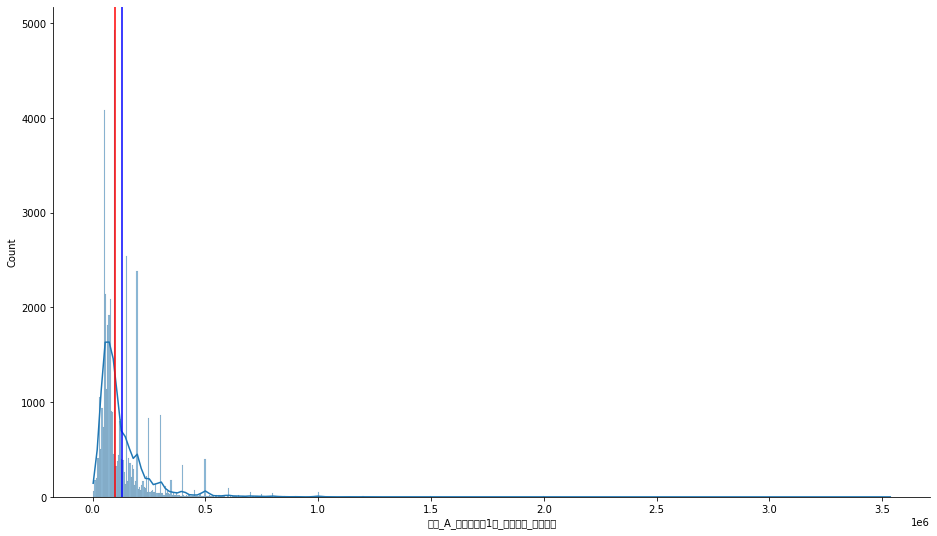

In [21]:
# 기준모델 분포확인 
import matplotlib.pyplot as plt
import seaborn as sns

# 기준모델 확률밀도함수 그리기
sns.displot(travel['국내_A_여행경험자1회_여행지출_국내전체'], kde=True)

## 평균과, 중간값으로 수직선 그려보기 
plt.axvline(travel['국내_A_여행경험자1회_여행지출_국내전체'].mean(), color='blue')
plt.axvline(travel['국내_A_여행경험자1회_여행지출_국내전체'].median(), color='red');

plt.gcf().set_size_inches(15, 8);

plt.show();